<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">Lab4 (เสริม): โครงข่ายประสาทเทียม (Neural Networks)</h1>
</div>

<h1 style="margin: 0 ; font-size: 25px;">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="margin: 0 ; font-size: 25px;">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;"">1.1 นำข้อมูลเข้า</h1>

In [2]:
data = pd.read_csv('riceClassification.csv') # อ่านไฟล์ csv ชื่อ 'riceClassification.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


<h1 style="font-size: 18px;"">1.2 สำรวจข้อมูล</h1>

In [3]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [4]:
data.describe().round(2) # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.0,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00,18185.00
mean,9093.0,7036.49,151.68,59.81,0.92,7225.82,94.13,0.62,351.61,0.71,2.60,0.55
std,5249.7,1467.20,12.38,10.06,0.03,1502.01,9.91,0.10,29.50,0.07,0.43,0.50
min,1.0,2522.00,74.13,34.41,0.68,2579.00,56.67,0.38,197.02,0.17,1.36,0.00
25%,4547.0,5962.00,145.68,51.39,0.89,6125.00,87.13,0.54,333.99,0.65,2.21,0.00
50%,9093.0,6660.00,153.88,55.72,0.92,6843.00,92.09,0.60,353.09,0.70,2.60,1.00
75%,13639.0,8423.00,160.06,70.16,0.94,8645.00,103.56,0.70,373.00,0.77,2.96,1.00
max,18185.0,10210.00,183.21,82.55,0.97,11008.00,114.02,0.89,508.51,0.90,3.91,1.00


<h1 style="font-size: 18px;"">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [5]:
data = data.drop('id', axis=1) # ลบคอลัมน์ที่ชื่อ 'id'
data.head() # แสดงผล dataframe 5 แถวแรก

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


<h1 style="font-size: 18px;"">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

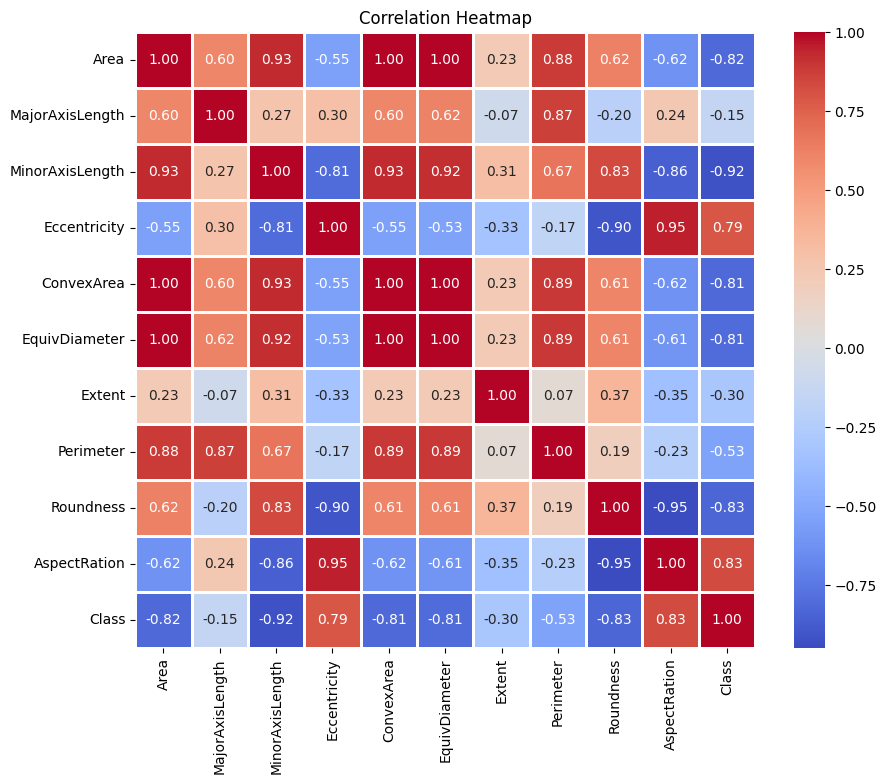

In [6]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [7]:
data.corr().Class.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Price' จากมากไปน้อย

Class              1.000000
AspectRation       0.832563
Eccentricity       0.788636
MajorAxisLength   -0.147741
Extent            -0.303440
Perimeter         -0.533274
EquivDiameter     -0.809361
ConvexArea        -0.814214
Area              -0.816589
Roundness         -0.831759
MinorAxisLength   -0.917766
Name: Class, dtype: float64

<h1 style="font-size: 18px;"">1.5 ดูการกระจายตัวของข้อมูล</h1>

1    9985
0    8200
Name: Class, dtype: int64


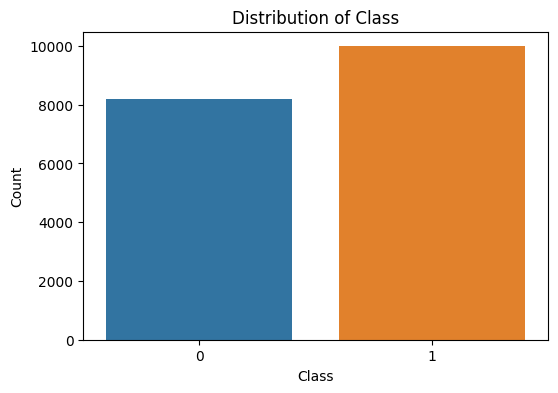

In [8]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Class'
class_counts = data['Class'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h1 style="margin: 0 ; font-size: 25px;">2. ปรับช่วงของข้อมูล (Feature Scaling)</h1>

In [9]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;"">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [10]:
# X เป็น Features
X = data.drop('Class', axis=1)
# y เป็น Label
y = data['Class']

<h1 style="font-size: 18px;"">2.2 ทำการ Standardize ข้อมูลส่วน Features</h1>

In [11]:
X = pd.DataFrame(pre_process.fit_transform(X)) # ปรับช่วงของ Features ทั้งหมด
X.head() # แสดงผล dataframe 5 แถวแรก

,0,1,2,3,4,5,6,7,8,9
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645


In [12]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
X = np.array(X)  # เปลี่ยน type ของ X ให้เป็น array
y = np.array(y)  # เปลี่ยน type ของ y ให้เป็น array
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="margin: 0 ; font-size: 25px;">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [14]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.model_selection import train_test_split

# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size=0.3, random_state=42, stratify=y)

In [15]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 12729 , length of X_test: 5456


In [16]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (12729, 10)
shape of X_test: (5456, 10)
shape of y_train: (12729,)
shape of y_test: (5456,)


<h1 style="margin: 0 ; font-size: 25px;">4. Neural Networks Model from scratch</h1>

In [17]:
class DeepNeuralNetwork:
    def __init__(self, layer_dims, dropout_probs=None):
        # layer_dims จะเก็บค่าจำนวน Features และจำนวน nodes ในแต่ละ layer ไว้
        # dropout_probs จะเก็บค่าความน่าจะเป็นในการ dropout node ในแต่ละ layer ออกไป
        self.parameters = {}
        self.dropout_masks = {}
        self.dropout_probs = dropout_probs if dropout_probs else [0.0] * len(layer_dims)
        self.num_layers = len(layer_dims) - 1  # ไม่เอา input layer
        
        for l in range(1, self.num_layers + 1):
            self.parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
            self.parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))

    @staticmethod
    def sigmoid(z):  # ฟังก์ชัน Sigmoid
        return 1 / (1 + np.exp(-z))
    
    @staticmethod    # อนุพันธ์ของฟังก์ชัน Sigmoid
    def sigmoid_derivative(z):
        s = 1 / (1 + np.exp(-z))
        return s * (1 - s)

    def dropout(self, A, dropout_prob): # ฟังก์ชัน dropout
        mask = np.random.rand(A.shape[0], A.shape[1]) > dropout_prob
        A *= mask
        A /= (1 - dropout_prob)
        return A, mask

    def forward_propagation(self, X): # การทำ Forward Propagation
        self.caches = {}
        A = X.T
        for l in range(1, self.num_layers + 1):
            Z = np.dot(self.parameters["W" + str(l)], A) + self.parameters["b" + str(l)]
            if l != self.num_layers:  # if not the output layer
                A, mask = self.dropout(np.tanh(Z), self.dropout_probs[l])
                self.caches["A" + str(l)] = A
                self.dropout_masks[l] = mask
            else:  # สำหรับ output layer
                A = self.sigmoid(Z)
        self.caches["A" + str(self.num_layers)] = A
        return A

    def compute_cost(self, y): # คำนวณค่า Cost
        A = self.caches["A" + str(self.num_layers)]
        m = y.shape[1]
        cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        return cost

    def backward_propagation(self, X, y): # การทำ Backward Propagation
        m = X.shape[0]
        self.grads = {}
        A_L = self.caches["A" + str(self.num_layers)]
        
        # เริ่มการทำ Backward Propagation จาก output layer ก่อน
        self.grads["dZ" + str(self.num_layers)] = A_L - y.T
        self.grads["dW" + str(self.num_layers)] = np.dot(self.grads["dZ" + str(self.num_layers)], self.caches["A" + str(self.num_layers - 1)].T) / m
        self.grads["db" + str(self.num_layers)] = np.sum(self.grads["dZ" + str(self.num_layers)], axis=1, keepdims=True) / m
        
        # จากนั้น ทำ Backward Propagation ย้อนกลับไปจนถึง layer แรกสุด
        for l in reversed(range(1, self.num_layers)):
            dZ = self.grads["dZ" + str(l + 1)]
            W = self.parameters["W" + str(l + 1)]
            A_prev = self.caches["A" + str(l-1)] if l > 1 else X.T
            A_curr = self.caches["A" + str(l)]
            
            self.grads["dZ" + str(l)] = np.dot(W.T, dZ) * (1 - np.square(A_curr))
            if l > 1:  # ใส่ dropout masks
                self.grads["dZ" + str(l)] *= self.dropout_masks[l]
            
            self.grads["dW" + str(l)] = np.dot(self.grads["dZ" + str(l)], A_prev.T) / m
            self.grads["db" + str(l)] = np.sum(self.grads["dZ" + str(l)], axis=1, keepdims=True) / m

    def update_parameters(self, learning_rate): #อัพเดท w และ b
        for l in range(1, self.num_layers + 1):
            self.parameters["W" + str(l)] -= learning_rate * self.grads["dW" + str(l)]
            self.parameters["b" + str(l)] -= learning_rate * self.grads["db" + str(l)]

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        # เราอยากเก็บ training history ไว้ เพราะฉะนั้นจึงสร้างตัวแปร dictionary ชื่อ 'history' เพื่อเก็บค่าต่างๆระหว่างการ train ไว้
        history = {
            "train_cost": [],
            "train_accuracy": [],
            "test_cost": [],
            "test_accuracy": []
        }
        
        y_train_reshaped = y_train.reshape(-1, 1)
        y_test_reshaped = y_test.reshape(-1, 1)
        
        for i in range(epochs):
            # ทำ Forward และ Backward propagation กับ training data
            self.forward_propagation(X_train)
            train_cost = self.compute_cost(y_train_reshaped)
            self.backward_propagation(X_train, y_train_reshaped)
            self.update_parameters(learning_rate)

            # คำนวณ training accuracy
            train_accuracy = self.evaluate(X_train, y_train_reshaped)
            
            # คำนวณ test cost และ test accuracy
            self.forward_propagation(X_test)
            test_cost = self.compute_cost(y_test_reshaped)
            test_accuracy = self.evaluate(X_test, y_test_reshaped)
            
            # เก็บค่าที่ได้ไว้ในตัวแปร history
            history["train_cost"].append(train_cost)
            history["train_accuracy"].append(train_accuracy)
            history["test_cost"].append(test_cost)
            history["test_accuracy"].append(test_accuracy)
            
            # แสดงผลว่าเทรนถึงรอบที่เท่าไรแล้ว
            if i % 10 == 0 or i == epochs - 1:
                print(f"Epoch {i + 1} / {epochs}")
                print(f"Train Cost: {train_cost}, Train Accuracy: {train_accuracy*100:.2f}%")
                print(f"Test Cost: {test_cost}, Test Accuracy: {test_accuracy*100:.2f}%")
                print("-"*50)
                
        return history

    def predict(self, X): # ทำนาย test data
        predictions = self.forward_propagation(X)
        return (predictions > 0.5).astype(int)

    def evaluate(self, X, y): # คำนวณค่า accuracy
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy


In [18]:
layer_dims = [10, 5, 3, 1]  # ข้อมูลเรามี 10 Features, layer แรกมี 5 nodes, ต่อมาจะมี 3 และ 1 ตามลำดับ
dropout_probs = [0.0, 0.2, 0.3, 0.0] # ใส่ความน่าจำเป็นในการ dropout node ในแต่ละ layer
epochs = 100 # กำหนดจำนวนรอบการเทรน
learning_rate = 0.01 # กำหนดค่าอัตราการเรียนรู้

nn = DeepNeuralNetwork(layer_dims, dropout_probs)
history = nn.train(X_train, y_train, X_test, y_test, epochs, learning_rate)
predictions_train = nn.predict(X_train)
predictions_test = nn.predict(X_test)
train_accuracy = nn.evaluate(X_train, y_train)
test_accuracy = nn.evaluate(X_test, y_test)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1 / 100
Train Cost: 0.6931471813234288, Train Accuracy: 54.91%
Test Cost: 0.693123110753657, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 11 / 100
Train Cost: 0.692912092137368, Train Accuracy: 54.91%
Test Cost: 0.6928889108940802, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 21 / 100
Train Cost: 0.6926884817278296, Train Accuracy: 54.91%
Test Cost: 0.6926661372002321, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 31 / 100
Train Cost: 0.6924757991329259, Train Accuracy: 54.91%
Test Cost: 0.6924542443111421, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 41 / 100
Train Cost: 0.6922734981921997, Train Accuracy: 54.91%
Test Cost: 0.6922526803978434, Test Accuracy: 54.91%
--------------------------------------------------
Epoch 51 / 100
Train Cost: 0.6920810749624706, Train Accuracy: 54.91%
Test Cost: 0.6920609667138053, Test Accuracy: 54.91%
----------

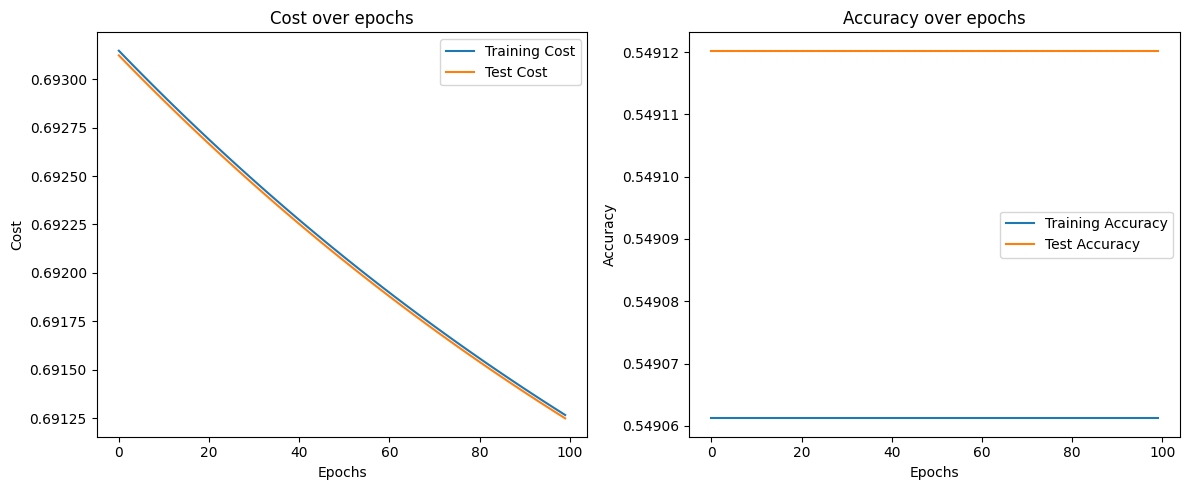

In [19]:
def plot_history(history):
    # แยกข้อมูลต่างๆของตัวแปร history เก็บไว้ในตัวแปรอื่นๆ
    train_cost = history['train_cost']
    train_accuracy = history['train_accuracy']
    test_cost = history['test_cost']
    test_accuracy = history['test_accuracy']

    # แสดงกราฟประวัติค่า cost ที่เกิดขึ้นระหว่างการเทรนโมเดล 
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_cost, label='Training Cost')
    plt.plot(test_cost, label='Test Cost')
    plt.title('Cost over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()

    # แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล 
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(test_accuracy, label='Test Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [20]:
predictions = nn.predict(X_test[28])
print('prediction is class:', predictions[0][0])

prediction is class: 1
